In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

In [4]:
group1 = pd.read_csv('group1_new.csv')

In [5]:
group1_stn = list(group1['stn'].values)
stn1 = []
for v in group1_stn:
    if v not in stn1:
        stn1.append(v)
print(stn1)

[13]


In [7]:
sub = pd.read_csv('./202206_uv_final.csv')

In [8]:
sub1 = sub[sub['stn'].isin(stn1)]

In [9]:
group1

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20200101,0,13,126.16,33.3,0.0,0.00000,0.00000,0.00000,-0.00075,...,250.75924,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.0,0
1,20200101,10,13,126.16,33.3,0.0,-0.00057,0.00000,0.00119,-0.00015,...,249.26338,267.39961,267.63692,266.66849,258.21621,166.67178,38.96359,-9.50910,71.0,0
2,20200101,20,13,126.16,33.3,0.0,0.00000,0.00000,-0.00030,0.00030,...,249.61859,268.27856,268.19710,267.20654,258.38663,167.94722,38.96359,-9.50910,71.0,0
3,20200101,30,13,126.16,33.3,0.0,-0.00057,0.00000,-0.00030,0.00030,...,249.79544,268.44652,268.07856,267.50047,258.67009,168.93011,38.96359,-9.50910,71.0,0
4,20200101,40,13,126.16,33.3,0.0,-0.00113,-0.00057,-0.00119,-0.00030,...,249.86163,268.64762,268.58556,267.34496,258.50010,169.53722,38.96359,-9.50910,71.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101952,20211231,2310,13,126.16,33.3,0.0,-0.00113,0.00057,0.00000,0.00000,...,237.34683,249.40735,247.69928,246.54564,242.35466,156.05597,38.96359,-8.88492,71.0,0
101953,20211231,2320,13,126.16,33.3,0.0,0.00000,-0.00057,-0.00060,-0.00105,...,239.30603,251.95026,249.51067,247.96883,243.12601,158.01080,38.96359,-8.88492,71.0,0
101954,20211231,2330,13,126.16,33.3,0.0,-0.00057,-0.00057,0.00089,-0.00015,...,239.46403,252.96278,250.84725,248.64059,243.73861,159.91946,38.96359,-8.88492,71.0,0
101955,20211231,2340,13,126.16,33.3,0.0,-0.00057,-0.00057,0.00030,-0.00015,...,239.04169,252.03346,250.09823,248.36829,243.54213,161.76646,38.96359,-8.88492,71.0,0


In [10]:
group1_val = group1[(group1['yyyymmdd'] >= 20210601) & (group1['yyyymmdd'] < 20210701)]
idx1 = group1_val.index
all_group1 = group1.drop(group1.index[idx1])

In [11]:
all_group1

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20200101,0,13,126.16,33.3,0.0,0.00000,0.00000,0.00000,-0.00075,...,250.75924,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.0,0
1,20200101,10,13,126.16,33.3,0.0,-0.00057,0.00000,0.00119,-0.00015,...,249.26338,267.39961,267.63692,266.66849,258.21621,166.67178,38.96359,-9.50910,71.0,0
2,20200101,20,13,126.16,33.3,0.0,0.00000,0.00000,-0.00030,0.00030,...,249.61859,268.27856,268.19710,267.20654,258.38663,167.94722,38.96359,-9.50910,71.0,0
3,20200101,30,13,126.16,33.3,0.0,-0.00057,0.00000,-0.00030,0.00030,...,249.79544,268.44652,268.07856,267.50047,258.67009,168.93011,38.96359,-9.50910,71.0,0
4,20200101,40,13,126.16,33.3,0.0,-0.00113,-0.00057,-0.00119,-0.00030,...,249.86163,268.64762,268.58556,267.34496,258.50010,169.53722,38.96359,-9.50910,71.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101952,20211231,2310,13,126.16,33.3,0.0,-0.00113,0.00057,0.00000,0.00000,...,237.34683,249.40735,247.69928,246.54564,242.35466,156.05597,38.96359,-8.88492,71.0,0
101953,20211231,2320,13,126.16,33.3,0.0,0.00000,-0.00057,-0.00060,-0.00105,...,239.30603,251.95026,249.51067,247.96883,243.12601,158.01080,38.96359,-8.88492,71.0,0
101954,20211231,2330,13,126.16,33.3,0.0,-0.00057,-0.00057,0.00089,-0.00015,...,239.46403,252.96278,250.84725,248.64059,243.73861,159.91946,38.96359,-8.88492,71.0,0
101955,20211231,2340,13,126.16,33.3,0.0,-0.00057,-0.00057,0.00030,-0.00015,...,239.04169,252.03346,250.09823,248.36829,243.54213,161.76646,38.96359,-8.88492,71.0,0


In [12]:
group1_val

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
72035,20210601,0,13,126.16,33.3,0.0,-0.00057,-0.00057,-0.00030,-0.00015,...,261.03071,288.20636,288.66218,286.97684,272.21622,123.72706,38.96359,-5.16304,71.0,0
72036,20210601,10,13,126.16,33.3,0.0,-0.00057,-0.00057,0.00000,-0.00045,...,261.04931,288.28731,288.75925,287.05008,272.26676,124.10999,38.96359,-5.16304,71.0,0
72037,20210601,30,13,126.16,33.3,0.0,-0.00057,0.00000,0.00089,-0.00030,...,260.99350,288.42206,288.88393,287.15254,272.36778,124.57538,38.96359,-5.16304,71.0,0
72038,20210601,40,13,126.16,33.3,0.0,-0.00057,0.00000,-0.00089,0.00030,...,259.52637,285.60820,285.68193,283.95280,269.85226,124.63251,38.96359,-5.16304,71.0,0
72039,20210601,50,13,126.16,33.3,0.0,0.00000,0.00000,0.00119,-0.00045,...,258.74239,284.56326,284.57933,282.86810,269.18091,124.50724,38.96359,-5.16304,71.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76303,20210630,2310,13,126.16,33.3,0.0,0.00000,-0.00057,-0.00060,-0.00075,...,264.10562,291.72055,291.21376,288.36134,273.17306,118.83560,38.96359,-4.36193,71.0,0
76304,20210630,2320,13,126.16,33.3,0.0,-0.00057,0.00000,0.00000,0.00120,...,264.21237,291.85081,291.47125,288.63650,273.37359,119.71352,38.96359,-4.36193,71.0,0
76305,20210630,2330,13,126.16,33.3,0.0,0.00000,0.00000,-0.00060,-0.00060,...,264.31896,291.86383,291.64710,288.73773,273.54047,120.50912,38.96359,-4.36193,71.0,0
76306,20210630,2340,13,126.16,33.3,0.0,0.00000,0.00057,-0.00089,0.00000,...,264.26568,291.85081,291.59302,288.76663,273.55714,121.21901,38.96359,-4.36193,71.0,0


In [15]:
X = all_group1[['hhnn','band1', 'band2','band3', 'band7',
       'band11', 'band12', 'band13', 'solarza','esr', 'height']]
Y = all_group1['uv']

x = group1_val[['hhnn','band1', 'band2','band3', 'band7',
       'band11', 'band12', 'band13', 'solarza','esr', 'height']]
y = group1_val['uv']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=123)

X_train = pd.concat([X,X_train])
y_train = pd.concat([Y,y_train])

lgbm = LGBMRegressor(n_estimators = 5000, learning_rate = 0.017, max_depth=11, subsample=0.5,colsample_bytree=0.7,  random_state = 2000).fit(X_train,y_train, eval_set=[(X_test, y_test)], 
early_stopping_rounds=100)

[1]	valid_0's l2: 7.71002
[2]	valid_0's l2: 7.4767
[3]	valid_0's l2: 7.24854
[4]	valid_0's l2: 7.03117
[5]	valid_0's l2: 6.81651
[6]	valid_0's l2: 6.62933
[7]	valid_0's l2: 6.484
[8]	valid_0's l2: 6.30824
[9]	valid_0's l2: 6.12234
[10]	valid_0's l2: 5.95566
[11]	valid_0's l2: 5.79365
[12]	valid_0's l2: 5.62356
[13]	valid_0's l2: 5.45892
[14]	valid_0's l2: 5.34145
[15]	valid_0's l2: 5.19588
[16]	valid_0's l2: 5.0546
[17]	valid_0's l2: 4.90733
[18]	valid_0's l2: 4.76671
[19]	valid_0's l2: 4.62937
[20]	valid_0's l2: 4.49773
[21]	valid_0's l2: 4.37879
[22]	valid_0's l2: 4.26178
[23]	valid_0's l2: 4.15092
[24]	valid_0's l2: 4.03668
[25]	valid_0's l2: 3.92313
[26]	valid_0's l2: 3.81644
[27]	valid_0's l2: 3.70955
[28]	valid_0's l2: 3.60655
[29]	valid_0's l2: 3.50579
[30]	valid_0's l2: 3.40982
[31]	valid_0's l2: 3.31608
[32]	valid_0's l2: 3.22895
[33]	valid_0's l2: 3.14157
[34]	valid_0's l2: 3.06505
[35]	valid_0's l2: 2.98869
[36]	valid_0's l2: 2.90851
[37]	valid_0's l2: 2.83114
[38]	valid_0's

[321]	valid_0's l2: 0.467095
[322]	valid_0's l2: 0.466873
[323]	valid_0's l2: 0.466557
[324]	valid_0's l2: 0.466503
[325]	valid_0's l2: 0.466501
[326]	valid_0's l2: 0.46619
[327]	valid_0's l2: 0.466194
[328]	valid_0's l2: 0.465907
[329]	valid_0's l2: 0.465897
[330]	valid_0's l2: 0.466155
[331]	valid_0's l2: 0.466071
[332]	valid_0's l2: 0.465996
[333]	valid_0's l2: 0.465846
[334]	valid_0's l2: 0.465548
[335]	valid_0's l2: 0.464953
[336]	valid_0's l2: 0.464112
[337]	valid_0's l2: 0.464317
[338]	valid_0's l2: 0.464119
[339]	valid_0's l2: 0.463925
[340]	valid_0's l2: 0.463724
[341]	valid_0's l2: 0.463542
[342]	valid_0's l2: 0.463419
[343]	valid_0's l2: 0.463705
[344]	valid_0's l2: 0.463845
[345]	valid_0's l2: 0.463846
[346]	valid_0's l2: 0.463501
[347]	valid_0's l2: 0.463538
[348]	valid_0's l2: 0.463353
[349]	valid_0's l2: 0.463714
[350]	valid_0's l2: 0.463811
[351]	valid_0's l2: 0.463598
[352]	valid_0's l2: 0.463327
[353]	valid_0's l2: 0.463325
[354]	valid_0's l2: 0.462991
[355]	valid_0's

[617]	valid_0's l2: 0.44153
[618]	valid_0's l2: 0.441354
[619]	valid_0's l2: 0.441569
[620]	valid_0's l2: 0.441411
[621]	valid_0's l2: 0.441366
[622]	valid_0's l2: 0.441444
[623]	valid_0's l2: 0.441569
[624]	valid_0's l2: 0.441493
[625]	valid_0's l2: 0.441245
[626]	valid_0's l2: 0.441038
[627]	valid_0's l2: 0.440933
[628]	valid_0's l2: 0.440886
[629]	valid_0's l2: 0.440744
[630]	valid_0's l2: 0.440708
[631]	valid_0's l2: 0.440735
[632]	valid_0's l2: 0.44026
[633]	valid_0's l2: 0.440402
[634]	valid_0's l2: 0.440445
[635]	valid_0's l2: 0.440392
[636]	valid_0's l2: 0.440436
[637]	valid_0's l2: 0.440417
[638]	valid_0's l2: 0.440381
[639]	valid_0's l2: 0.440507
[640]	valid_0's l2: 0.440666
[641]	valid_0's l2: 0.440667
[642]	valid_0's l2: 0.440163
[643]	valid_0's l2: 0.440096
[644]	valid_0's l2: 0.440093
[645]	valid_0's l2: 0.440101
[646]	valid_0's l2: 0.440154
[647]	valid_0's l2: 0.440124
[648]	valid_0's l2: 0.439828
[649]	valid_0's l2: 0.439895
[650]	valid_0's l2: 0.439884
[651]	valid_0's 

[913]	valid_0's l2: 0.431058
[914]	valid_0's l2: 0.431141
[915]	valid_0's l2: 0.431209
[916]	valid_0's l2: 0.431204
[917]	valid_0's l2: 0.431277
[918]	valid_0's l2: 0.431373
[919]	valid_0's l2: 0.431427
[920]	valid_0's l2: 0.431422
[921]	valid_0's l2: 0.431431
[922]	valid_0's l2: 0.431358
[923]	valid_0's l2: 0.431644
[924]	valid_0's l2: 0.431615
[925]	valid_0's l2: 0.431547
[926]	valid_0's l2: 0.431247
[927]	valid_0's l2: 0.431237
[928]	valid_0's l2: 0.43122
[929]	valid_0's l2: 0.431249
[930]	valid_0's l2: 0.431274
[931]	valid_0's l2: 0.431104
[932]	valid_0's l2: 0.431085
[933]	valid_0's l2: 0.43111
[934]	valid_0's l2: 0.431026
[935]	valid_0's l2: 0.431141
[936]	valid_0's l2: 0.430976
[937]	valid_0's l2: 0.430959
[938]	valid_0's l2: 0.430788
[939]	valid_0's l2: 0.430597
[940]	valid_0's l2: 0.430679
[941]	valid_0's l2: 0.43077
[942]	valid_0's l2: 0.430718
[943]	valid_0's l2: 0.430782
[944]	valid_0's l2: 0.43082
[945]	valid_0's l2: 0.430727
[946]	valid_0's l2: 0.430733
[947]	valid_0's l2

[1210]	valid_0's l2: 0.426359
[1211]	valid_0's l2: 0.42641
[1212]	valid_0's l2: 0.42642
[1213]	valid_0's l2: 0.426424
[1214]	valid_0's l2: 0.4263
[1215]	valid_0's l2: 0.426306
[1216]	valid_0's l2: 0.426206
[1217]	valid_0's l2: 0.426166
[1218]	valid_0's l2: 0.426179
[1219]	valid_0's l2: 0.426095
[1220]	valid_0's l2: 0.426117
[1221]	valid_0's l2: 0.426184
[1222]	valid_0's l2: 0.426474
[1223]	valid_0's l2: 0.426626
[1224]	valid_0's l2: 0.426588
[1225]	valid_0's l2: 0.426542
[1226]	valid_0's l2: 0.426465
[1227]	valid_0's l2: 0.426328
[1228]	valid_0's l2: 0.426272
[1229]	valid_0's l2: 0.426329
[1230]	valid_0's l2: 0.426238
[1231]	valid_0's l2: 0.426246
[1232]	valid_0's l2: 0.426183
[1233]	valid_0's l2: 0.426205
[1234]	valid_0's l2: 0.426101
[1235]	valid_0's l2: 0.426142
[1236]	valid_0's l2: 0.426129
[1237]	valid_0's l2: 0.426161
[1238]	valid_0's l2: 0.426148
[1239]	valid_0's l2: 0.426118
[1240]	valid_0's l2: 0.426123
[1241]	valid_0's l2: 0.426159
[1242]	valid_0's l2: 0.42618
[1243]	valid_0'

In [96]:
preds =xgb.predict(X_test)
mse = mean_squared_error(y_test, preds)
print("MSE: %f" % (mse))

sub1_test = sub1[['hhnn','band1', 'band2',
       'band3', 'band7',
       'band11', 'band12', 'band13', 'solarza',
       'esr', 'height']]

pred1 =xgb.predict(sub1_test)


MSE: 0.270803


In [98]:
group2 = pd.read_csv('group2.csv')
group2_stn = list(group2['stn'].values)
stn2 = []
for v in group2_stn:
    if v not in stn2:
        stn2.append(v)
print(stn2)

sub2 = sub[sub['stn'].isin(stn2)]

group2_val = group2[(group2['yyyymmdd'] >= 20210601) & (group2['yyyymmdd'] < 20210701)]
idx2 = group2_val.index
all_group2 = group2.drop(group2.index[idx2])

X = all_group2[['hhnn','band1', 'band2','band3', 'band7',
       'band11', 'band12', 'band13', 'solarza','esr', 'height']]
Y = all_group2['uv']

x = group2_val[['hhnn','band1', 'band2','band3', 'band7',
       'band11', 'band12', 'band13', 'solarza','esr', 'height']]
y = group2_val['uv']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=123)

X_train = pd.concat([X,X_train])
y_train = pd.concat([Y,y_train])

xgb2 = XGBRegressor(n_estimators = 1000, learning_rate = 0.017, max_depth=11, subsample=0.5,colsample_bytree=0.7,  random_state = 2000).fit(X_train,y_train, eval_set=[(X_test, y_test)], 
early_stopping_rounds=100)


preds =xgb2.predict(X_test)
mse = mean_squared_error(y_test, preds)
print("MSE: %f" % (mse))

sub2_test = sub2[['hhnn','band1', 'band2', 'band3', 'band7',
       'band11', 'band12', 'band13', 'solarza', 'esr', 'height']]

pred2 =xgb2.predict(sub2_test)

[131, 132, 133, 138, 152, 156, 159, 165, 143, 146]
[0]	validation_0-rmse:2.81487
[1]	validation_0-rmse:2.76688
[2]	validation_0-rmse:2.71975
[3]	validation_0-rmse:2.67378
[4]	validation_0-rmse:2.62765
[5]	validation_0-rmse:2.58221
[6]	validation_0-rmse:2.54776
[7]	validation_0-rmse:2.51354
[8]	validation_0-rmse:2.47013
[9]	validation_0-rmse:2.42831
[10]	validation_0-rmse:2.38719
[11]	validation_0-rmse:2.35550
[12]	validation_0-rmse:2.31559
[13]	validation_0-rmse:2.27842
[14]	validation_0-rmse:2.24851
[15]	validation_0-rmse:2.21103
[16]	validation_0-rmse:2.17356
[17]	validation_0-rmse:2.13702
[18]	validation_0-rmse:2.10149
[19]	validation_0-rmse:2.06684
[20]	validation_0-rmse:2.03410
[21]	validation_0-rmse:1.99960
[22]	validation_0-rmse:1.96653
[23]	validation_0-rmse:1.93374
[24]	validation_0-rmse:1.90321
[25]	validation_0-rmse:1.87170
[26]	validation_0-rmse:1.84249
[27]	validation_0-rmse:1.81281
[28]	validation_0-rmse:1.78472
[29]	validation_0-rmse:1.75576
[30]	validation_0-rmse:1.7265

[258]	validation_0-rmse:0.56487
[259]	validation_0-rmse:0.56493
[260]	validation_0-rmse:0.56487
[261]	validation_0-rmse:0.56486
[262]	validation_0-rmse:0.56473
[263]	validation_0-rmse:0.56476
[264]	validation_0-rmse:0.56474
[265]	validation_0-rmse:0.56467
[266]	validation_0-rmse:0.56462
[267]	validation_0-rmse:0.56457
[268]	validation_0-rmse:0.56454
[269]	validation_0-rmse:0.56438
[270]	validation_0-rmse:0.56438
[271]	validation_0-rmse:0.56423
[272]	validation_0-rmse:0.56421
[273]	validation_0-rmse:0.56402
[274]	validation_0-rmse:0.56382
[275]	validation_0-rmse:0.56378
[276]	validation_0-rmse:0.56383
[277]	validation_0-rmse:0.56388
[278]	validation_0-rmse:0.56385
[279]	validation_0-rmse:0.56377
[280]	validation_0-rmse:0.56386
[281]	validation_0-rmse:0.56363
[282]	validation_0-rmse:0.56367
[283]	validation_0-rmse:0.56361
[284]	validation_0-rmse:0.56353
[285]	validation_0-rmse:0.56338
[286]	validation_0-rmse:0.56335
[287]	validation_0-rmse:0.56332
[288]	validation_0-rmse:0.56328
[289]	va

[515]	validation_0-rmse:0.55399
[516]	validation_0-rmse:0.55396
[517]	validation_0-rmse:0.55393
[518]	validation_0-rmse:0.55386
[519]	validation_0-rmse:0.55368
[520]	validation_0-rmse:0.55355
[521]	validation_0-rmse:0.55352
[522]	validation_0-rmse:0.55350
[523]	validation_0-rmse:0.55334
[524]	validation_0-rmse:0.55331
[525]	validation_0-rmse:0.55318
[526]	validation_0-rmse:0.55312
[527]	validation_0-rmse:0.55312
[528]	validation_0-rmse:0.55313
[529]	validation_0-rmse:0.55311
[530]	validation_0-rmse:0.55314
[531]	validation_0-rmse:0.55312
[532]	validation_0-rmse:0.55308
[533]	validation_0-rmse:0.55300
[534]	validation_0-rmse:0.55298
[535]	validation_0-rmse:0.55295
[536]	validation_0-rmse:0.55296
[537]	validation_0-rmse:0.55282
[538]	validation_0-rmse:0.55276
[539]	validation_0-rmse:0.55274
[540]	validation_0-rmse:0.55272
[541]	validation_0-rmse:0.55272
[542]	validation_0-rmse:0.55256
[543]	validation_0-rmse:0.55248
[544]	validation_0-rmse:0.55249
[545]	validation_0-rmse:0.55246
[546]	va

[772]	validation_0-rmse:0.54604
[773]	validation_0-rmse:0.54602
[774]	validation_0-rmse:0.54597
[775]	validation_0-rmse:0.54598
[776]	validation_0-rmse:0.54593
[777]	validation_0-rmse:0.54587
[778]	validation_0-rmse:0.54591
[779]	validation_0-rmse:0.54574
[780]	validation_0-rmse:0.54570
[781]	validation_0-rmse:0.54578
[782]	validation_0-rmse:0.54580
[783]	validation_0-rmse:0.54579
[784]	validation_0-rmse:0.54576
[785]	validation_0-rmse:0.54577
[786]	validation_0-rmse:0.54577
[787]	validation_0-rmse:0.54573
[788]	validation_0-rmse:0.54572
[789]	validation_0-rmse:0.54574
[790]	validation_0-rmse:0.54572
[791]	validation_0-rmse:0.54569
[792]	validation_0-rmse:0.54565
[793]	validation_0-rmse:0.54566
[794]	validation_0-rmse:0.54560
[795]	validation_0-rmse:0.54560
[796]	validation_0-rmse:0.54557
[797]	validation_0-rmse:0.54548
[798]	validation_0-rmse:0.54545
[799]	validation_0-rmse:0.54550
[800]	validation_0-rmse:0.54549
[801]	validation_0-rmse:0.54557
[802]	validation_0-rmse:0.54551
[803]	va

In [99]:
group3 = pd.read_csv('group3.csv')
group3_stn = list(group3['stn'].values)
stn3 = []
for v in group3_stn:
    if v not in stn3:
        stn3.append(v)
print(stn3)

sub3 = sub[sub['stn'].isin(stn3)]

group3_val = group3[(group3['yyyymmdd'] >= 20210601) & (group3['yyyymmdd'] < 20210701)]
idx3 = group3_val.index
all_group3 = group3.drop(group3.index[idx3])

X = all_group3[['hhnn','band1', 'band2','band3', 'band7',
       'band11', 'band12', 'band13', 'solarza','esr', 'height']]
Y = all_group3['uv']

x = group3_val[['hhnn','band1', 'band2','band3', 'band7',
       'band11', 'band12', 'band13', 'solarza','esr', 'height']]
y = group3_val['uv']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=123)

X_train = pd.concat([X,X_train])
y_train = pd.concat([Y,y_train])

xgb3 = XGBRegressor(n_estimators = 1000, learning_rate = 0.017, max_depth=11, subsample=0.5,colsample_bytree=0.7,  random_state = 2000).fit(X_train,y_train, eval_set=[(X_test, y_test)], 
early_stopping_rounds=100)


preds =xgb3.predict(X_test)
mse = mean_squared_error(y_test, preds)
print("MSE: %f" % (mse))

sub3_test = sub3[['hhnn','band1', 'band2', 'band3', 'band7',
       'band11', 'band12', 'band13', 'solarza', 'esr', 'height']]

pred3 =xgb3.predict(sub3_test)

[13]
[0]	validation_0-rmse:2.95285
[1]	validation_0-rmse:2.90939
[2]	validation_0-rmse:2.86543
[3]	validation_0-rmse:2.82149
[4]	validation_0-rmse:2.78121
[5]	validation_0-rmse:2.73878


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:2.70552
[7]	validation_0-rmse:2.66456
[8]	validation_0-rmse:2.62446
[9]	validation_0-rmse:2.58666
[10]	validation_0-rmse:2.54930
[11]	validation_0-rmse:2.51022
[12]	validation_0-rmse:2.47204
[13]	validation_0-rmse:2.44234
[14]	validation_0-rmse:2.40716
[15]	validation_0-rmse:2.37319
[16]	validation_0-rmse:2.33795
[17]	validation_0-rmse:2.30410
[18]	validation_0-rmse:2.27027
[19]	validation_0-rmse:2.23766
[20]	validation_0-rmse:2.20522
[21]	validation_0-rmse:2.17567
[22]	validation_0-rmse:2.14411
[23]	validation_0-rmse:2.11257
[24]	validation_0-rmse:2.08289
[25]	validation_0-rmse:2.05949
[26]	validation_0-rmse:2.02894
[27]	validation_0-rmse:2.00128
[28]	validation_0-rmse:1.97330
[29]	validation_0-rmse:1.94608
[30]	validation_0-rmse:1.91921
[31]	validation_0-rmse:1.89414
[32]	validation_0-rmse:1.87380
[33]	validation_0-rmse:1.84810
[34]	validation_0-rmse:1.82878
[35]	validation_0-rmse:1.80566
[36]	validation_0-rmse:1.78034
[37]	validation_0-rmse:1.75784
[38]	validat

[266]	validation_0-rmse:0.63149
[267]	validation_0-rmse:0.63058
[268]	validation_0-rmse:0.63006
[269]	validation_0-rmse:0.62968
[270]	validation_0-rmse:0.62972
[271]	validation_0-rmse:0.62910
[272]	validation_0-rmse:0.62959
[273]	validation_0-rmse:0.62919
[274]	validation_0-rmse:0.62827
[275]	validation_0-rmse:0.62803
[276]	validation_0-rmse:0.62757
[277]	validation_0-rmse:0.62728
[278]	validation_0-rmse:0.62727
[279]	validation_0-rmse:0.62686
[280]	validation_0-rmse:0.62661
[281]	validation_0-rmse:0.62642
[282]	validation_0-rmse:0.62648
[283]	validation_0-rmse:0.62675
[284]	validation_0-rmse:0.62646
[285]	validation_0-rmse:0.62628
[286]	validation_0-rmse:0.62576
[287]	validation_0-rmse:0.62551
[288]	validation_0-rmse:0.62555
[289]	validation_0-rmse:0.62491
[290]	validation_0-rmse:0.62507
[291]	validation_0-rmse:0.62515
[292]	validation_0-rmse:0.62469
[293]	validation_0-rmse:0.62430
[294]	validation_0-rmse:0.62372
[295]	validation_0-rmse:0.62333
[296]	validation_0-rmse:0.62336
[297]	va

[779]	validation_0-rmse:0.58979
[780]	validation_0-rmse:0.58974
[781]	validation_0-rmse:0.58988
[782]	validation_0-rmse:0.58982
[783]	validation_0-rmse:0.59000
[784]	validation_0-rmse:0.58994
[785]	validation_0-rmse:0.58975
[786]	validation_0-rmse:0.58985
[787]	validation_0-rmse:0.58983
[788]	validation_0-rmse:0.58984
[789]	validation_0-rmse:0.58994
[790]	validation_0-rmse:0.59003
[791]	validation_0-rmse:0.59004
[792]	validation_0-rmse:0.59010
[793]	validation_0-rmse:0.59010
[794]	validation_0-rmse:0.58993
[795]	validation_0-rmse:0.58997
[796]	validation_0-rmse:0.58990
[797]	validation_0-rmse:0.58977
[798]	validation_0-rmse:0.58987
[799]	validation_0-rmse:0.58980
[800]	validation_0-rmse:0.58986
[801]	validation_0-rmse:0.59015
[802]	validation_0-rmse:0.59021
[803]	validation_0-rmse:0.59016
[804]	validation_0-rmse:0.59024
[805]	validation_0-rmse:0.59018
[806]	validation_0-rmse:0.59007
[807]	validation_0-rmse:0.59004
[808]	validation_0-rmse:0.58996
[809]	validation_0-rmse:0.59000
[810]	va

In [100]:
pred1

array([-8.7514294e-05, -8.4016028e-05,  3.7085038e-04, ...,
       -6.4519513e-04,  3.5597670e-05, -4.0293527e-03], dtype=float32)

In [101]:
sub1['uv'] = pred1
sub2['uv'] = pred2
sub3['uv'] = pred3

C:\Users\KMJ\AppData\Local\Temp/ipykernel_27824/2742569579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1['uv'] = pred1
C:\Users\KMJ\AppData\Local\Temp/ipykernel_27824/2742569579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub2['uv'] = pred2
C:\Users\KMJ\AppData\Local\Temp/ipykernel_27824/2742569579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [102]:
pred_end = pd.concat([sub1,sub2])
pred_end = pd.concat([pred_end,sub3])
pred_end

,yyyymmdd,hhnn,stn,lon,lat,band1,band2,band3,band4,band5,...,band13,band14,band15,band16,solarza,sateza,esr,height,landtype,uv
1,20220601,0,105,128.89098,37.75147,-0.00057,-0.00057,0.00000,-0.00030,0.00000,...,262.71227,261.14580,257.52658,246.95577,119.74915,43.95463,-4.61100,26.04,3,-0.000088
2,20220601,0,108,126.96500,37.57100,0.00000,-0.00057,-0.00030,0.00045,0.00000,...,271.81756,270.25616,266.99858,254.94651,119.65871,43.77999,-4.60329,85.50,3,-0.000084
3,20220601,0,112,126.62490,37.47772,0.00000,0.00000,0.00060,0.00045,-0.00030,...,273.52547,272.33661,269.12853,256.15036,119.71313,43.67046,-4.61180,68.99,3,0.000371
4,20220601,0,115,130.89864,37.48129,0.00000,0.00000,0.00089,-0.00030,0.00030,...,253.29031,251.46606,249.01625,240.92761,120.21661,43.74521,-4.67107,222.80,4,0.000174
16,20220601,10,105,128.89098,37.75147,-0.00057,-0.00057,0.00030,0.00030,-0.00091,...,265.80375,263.13564,260.70867,249.80529,119.99587,43.95463,-4.61100,26.04,3,-0.000090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51780,20220624,2320,13,126.16000,33.30000,0.00000,0.00000,-0.00089,-0.00105,-0.00030,...,292.59014,292.71004,290.38982,274.48758,119.56403,38.96359,-4.34718,71.00,0,0.000143
51795,20220624,2330,13,126.16000,33.30000,-0.00057,-0.00057,-0.00089,-0.00105,0.00060,...,292.68057,292.80377,290.46119,274.45446,120.34518,38.96359,-4.34718,71.00,0,0.000143
51810,20220624,2340,13,126.16000,33.30000,0.00000,-0.00057,-0.00119,-0.00045,-0.00030,...,292.83541,292.96426,290.51826,274.40477,121.04053,38.96359,-4.34718,71.00,0,0.000143
51825,20220624,2350,13,126.16000,33.30000,0.00000,0.00000,-0.00119,-0.00045,0.00030,...,292.68057,292.75022,290.23268,274.12284,121.64697,38.96359,-4.34718,71.00,0,0.000136


In [103]:
pred_=pred_end.sort_index(ascending=True)

In [104]:
pred_

,yyyymmdd,hhnn,stn,lon,lat,band1,band2,band3,band4,band5,...,band13,band14,band15,band16,solarza,sateza,esr,height,landtype,uv
0,20220601,0,13,126.16000,33.30000,0.00000,0.00000,-0.00060,0.00060,-0.0003,...,251.49092,250.11913,248.78686,243.12601,123.72706,38.96359,-5.16304,71.00,0,0.000265
1,20220601,0,105,128.89098,37.75147,-0.00057,-0.00057,0.00000,-0.00030,0.0000,...,262.71227,261.14580,257.52658,246.95577,119.74915,43.95463,-4.61100,26.04,3,-0.000088
2,20220601,0,108,126.96500,37.57100,0.00000,-0.00057,-0.00030,0.00045,0.0000,...,271.81756,270.25616,266.99858,254.94651,119.65871,43.77999,-4.60329,85.50,3,-0.000084
3,20220601,0,112,126.62490,37.47772,0.00000,0.00000,0.00060,0.00045,-0.0003,...,273.52547,272.33661,269.12853,256.15036,119.71313,43.67046,-4.61180,68.99,3,0.000371
4,20220601,0,115,130.89864,37.48129,0.00000,0.00000,0.00089,-0.00030,0.0003,...,253.29031,251.46606,249.01625,240.92761,120.21661,43.74521,-4.67107,222.80,4,0.000174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,20220625,0,146,127.11900,35.84080,0.00000,-0.00057,-0.00089,0.00015,0.0000,...,286.87485,287.19605,285.48855,271.35400,119.84431,41.81018,-4.59718,62.90,3,0.024899
51851,20220625,0,152,129.33472,35.58250,-0.00057,0.00000,-0.00030,-0.00030,-0.0003,...,293.32422,293.51096,291.15861,274.60342,120.42121,41.52495,-4.67124,82.00,2,0.001403
51852,20220625,0,156,126.89158,35.17294,0.00000,0.00000,0.00089,-0.00030,-0.0003,...,290.14436,290.23278,288.05655,273.15633,120.46896,41.04849,-4.68457,72.38,3,0.000946
51853,20220625,0,159,129.03203,35.10468,0.00000,0.00057,0.00030,-0.00075,-0.0003,...,287.80066,287.63090,285.01340,270.36623,120.85844,40.96396,-4.73249,69.56,3,0.001457


In [105]:
submission = pd.read_csv('../1-1_검증데이터셋_수정.csv')

In [106]:
submission['UV']=pred_[['uv']]
submission

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,0.000265
1,202206010000,105,-0.000088
2,202206010000,108,-0.000084
3,202206010000,112,0.000371
4,202206010000,115,0.000174
...,...,...,...
51850,202206250000,146,0.024899
51851,202206250000,152,0.001403
51852,202206250000,156,0.000946
51853,202206250000,159,0.001457


<AxesSubplot:>

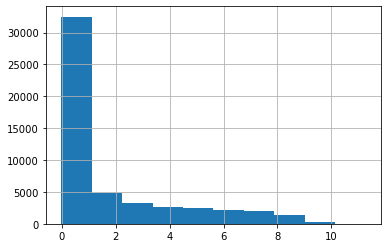

In [107]:
submission['UV'].hist()      

In [108]:
submission.to_csv('220224_uv_group_valchange.csv', index=False)